In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


There are 10683 Rows and 11 Columns in the  train data.

In [6]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

All the columns are in String Data types except for the last column, which also happens to be our Target Variable "Price".

In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In the column "Price", Mean or the Average is 9087.06, Smallest and the Biggest values are 1759.0 & 79512.0 respectively.

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are 2 Null Values present in the data. 
One in "Destination" column and other in "Total_stops"

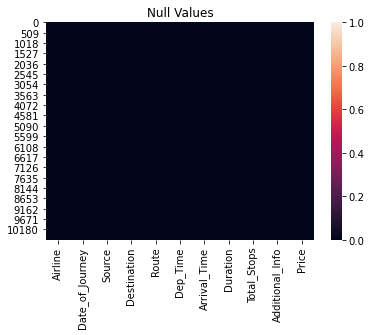

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

Due to very high numbers of columns and comperatively very low numbers of Null Values, There are no null values visible on the heat map.

In [9]:
df=df.dropna()

In [11]:
df.shape

(10682, 11)

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Due to very high numbers of columns and only 2 null values, the column with Null Values is droped. There are no Null Values present in the data anymore.

# Data Visulisation

10682


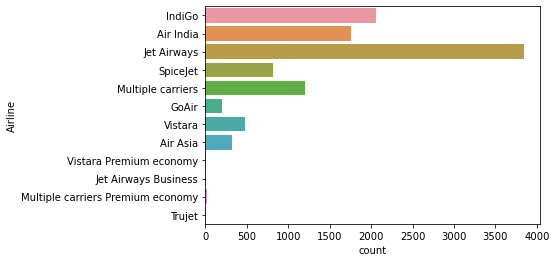

In [13]:
ax=sns.countplot(y='Airline',data=df)
print(df['Airline'].count())

As per the visualistion, 'Jet Airways' has the highest number of Flights and 'Vistara premium Economy', 'Jet Airways Business' and, 'Trujet' has the least number of Flights.

10682


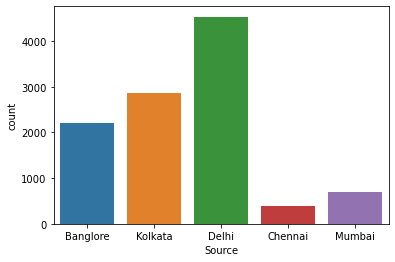

In [14]:
ax=sns.countplot(x='Source',data=df)
print(df['Source'].count())

'Delhi' is the most frequent Bording Airport, more than 4000 Flights were Boarded from Delhi, and 'Chennai' being the least boarded Airport where only around 500 Flights were boarded by their passengers.

10682


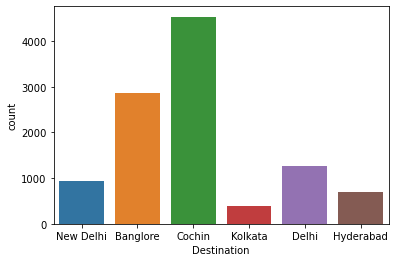

In [21]:
ax=sns.countplot(x='Destination',data=df)
print(df['Destination'].count())

More than 4000 Flights were completed in "Cochin", and least flights were destined for "Kolkata" i.e. 500.

10682


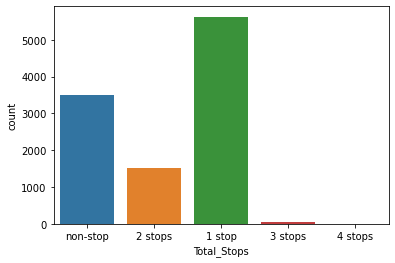

In [17]:
ax=sns.countplot(x='Total_Stops',data=df)
print(df['Total_Stops'].count())

Most Flights are having 1 Stop i.e. more than 5000 flights, And there are nearly no flights with 4 Stops.
And around 3500 flights are Non-Stop.

10682


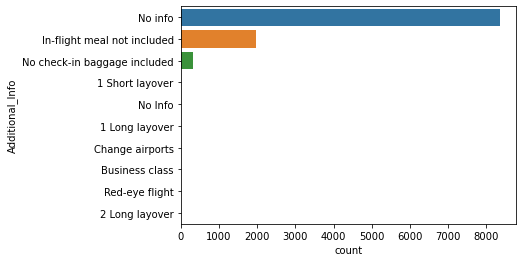

In [20]:
ax=sns.countplot(y='Additional_Info',data=df)
print(df['Additional_Info'].count())

Well, For addtional information more than 8000 flights have 'No-Info', But there are still 9 different Additional informations provided for rest of the flights.

10682


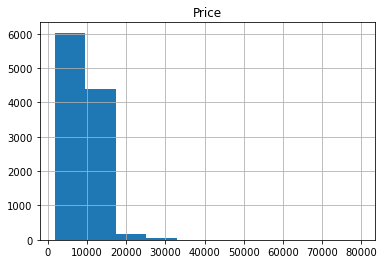

In [23]:
df['Price'].hist(grid=True)
plt.title('Price')
print(df['Price'].count())
plt.show()

More than 6000 flights are priced between 1000-9000, Around 4400 Flights are priced between 9000-17000, Around 100 Flights are priced Around 17000-25000 and About 100 flights are priced Around 25000-32000.   

# Encoding the data

In [26]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [27]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [28]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3.0,24.0,0.0,5.0,18.0,211.0,233.0,240.0,4.0,8.0,3897
1,1.0,6.0,3.0,0.0,84.0,31.0,906.0,336.0,1.0,8.0,7662
2,4.0,43.0,2.0,1.0,118.0,70.0,413.0,106.0,1.0,8.0,13882
3,3.0,10.0,3.0,0.0,91.0,164.0,1324.0,311.0,0.0,8.0,6218
4,3.0,0.0,0.0,5.0,29.0,149.0,1237.0,303.0,0.0,8.0,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,41.0,3.0,0.0,64.0,183.0,1259.0,236.0,4.0,8.0,4107
10679,1.0,29.0,3.0,0.0,64.0,193.0,1305.0,237.0,4.0,8.0,4145
10680,4.0,29.0,0.0,2.0,18.0,58.0,824.0,280.0,4.0,8.0,7229
10681,10.0,0.0,0.0,5.0,18.0,92.0,938.0,238.0,4.0,8.0,12648


# Checking for Correlation

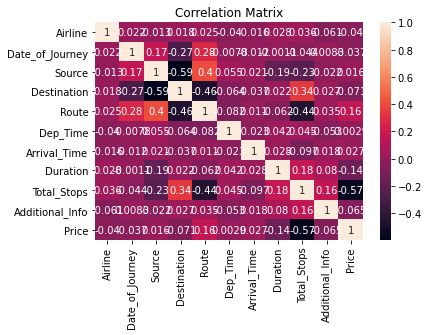

In [29]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [30]:
corr_matrix=df.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price              1.000000
Route              0.164149
Arrival_Time       0.027358
Source             0.015999
Dep_Time           0.002931
Date_of_Journey   -0.036907
Airline           -0.039565
Additional_Info   -0.065463
Destination       -0.071122
Duration          -0.144280
Total_Stops       -0.571221
Name: Price, dtype: float64

Variable 'Route' is Highly correlated to the Target Variable, Whereas 'Total_Stops' is Least Correlated.

# Checking for Skewness

In [31]:
df.skew()

Airline            0.731057
Date_of_Journey   -0.070718
Source            -0.424023
Destination        1.244046
Route             -0.501911
Dep_Time           0.194914
Arrival_Time      -0.606676
Duration          -0.213498
Total_Stops        0.631532
Additional_Info   -1.779689
Price              1.812405
dtype: float64

Keeping +/-(0.5) as the range of skewness.
There are 6 columns out of the range of skewness.

In [38]:
x=df.drop('Price', axis =1)
y=df['Price']

In [39]:
from sklearn.preprocessing import power_transform
df.new=power_transform(x)

df.new=pd.DataFrame(df.new,columns=x.columns)

In [40]:
df.new.skew()

Airline           -0.015281
Date_of_Journey   -0.228702
Source            -0.238295
Destination        0.041570
Route             -0.442919
Dep_Time          -0.150814
Arrival_Time      -0.381687
Duration          -0.390739
Total_Stops        0.325086
Additional_Info   -1.371943
dtype: float64

In [41]:
x=df.new

# Checking For Outliers

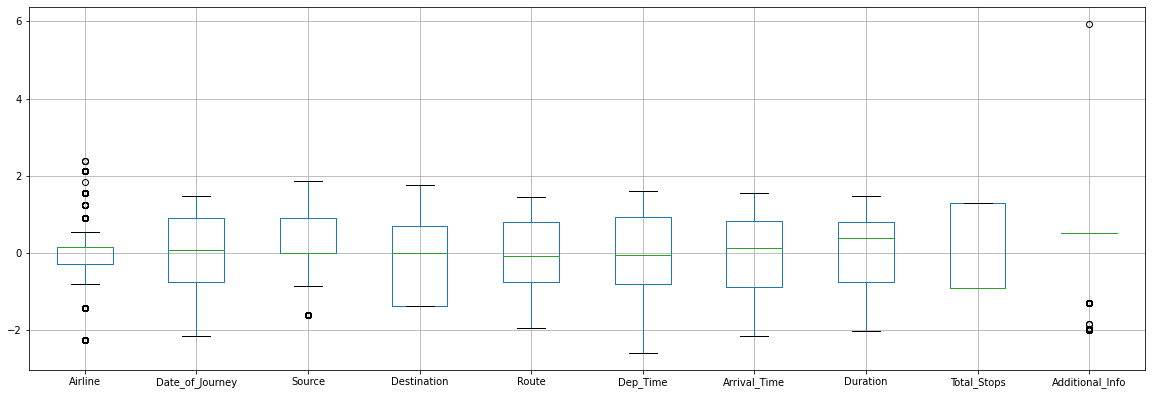

In [42]:
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=.25)
plt.show()

There are very few Outliers that could be seen near few columns but No treatment is required.

# Finding best random state

In [36]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression() 
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
from sklearn.metrics import r2_score

In [44]:
for i in range(0,100):
    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=i)
    dtr.fit(x_train,y_train) 
    pred_train=dtr.predict(x_train) 
    pred_test=dtr.predict(x_test) 
    print (f"At randon state {i}, the training accuracy is:- {r2_score(y_train, pred_train)}") 
    print (f"At random state {i}, the testing accuracy is:{r2_score(y_test,pred_test)}") 
    print("\n")

At randon state 0, the training accuracy is:- 0.9961956012678292
At random state 0, the testing accuracy is:0.7587424615242396


At randon state 1, the training accuracy is:- 0.9959294340095393
At random state 1, the testing accuracy is:0.7830927151637752


At randon state 2, the training accuracy is:- 0.9961753024270718
At random state 2, the testing accuracy is:0.8249871229016902


At randon state 3, the training accuracy is:- 0.996784468646589
At random state 3, the testing accuracy is:0.7077048291433399


At randon state 4, the training accuracy is:- 0.9961742798912464
At random state 4, the testing accuracy is:0.8272470921419635


At randon state 5, the training accuracy is:- 0.9963410718502986
At random state 5, the testing accuracy is:0.827112426724286


At randon state 6, the training accuracy is:- 0.9959939423322358
At random state 6, the testing accuracy is:0.8360595475172123


At randon state 7, the training accuracy is:- 0.9966994985868153
At random state 7, the testing acc

At randon state 63, the training accuracy is:- 0.9964594090218737
At random state 63, the testing accuracy is:0.7656901450051624


At randon state 64, the training accuracy is:- 0.996043546357798
At random state 64, the testing accuracy is:0.7968878491786913


At randon state 65, the training accuracy is:- 0.9962153225773765
At random state 65, the testing accuracy is:0.8065820139891527


At randon state 66, the training accuracy is:- 0.9959495817318731
At random state 66, the testing accuracy is:0.7665457051608319


At randon state 67, the training accuracy is:- 0.995539165288936
At random state 67, the testing accuracy is:0.850920877978283


At randon state 68, the training accuracy is:- 0.9959812826480324
At random state 68, the testing accuracy is:0.8020327649451444


At randon state 69, the training accuracy is:- 0.9962309815037362
At random state 69, the testing accuracy is:0.8553999669872471


At randon state 70, the training accuracy is:- 0.9956255303698014
At random state 70, 

Best Accuracy is for Decision Tree Regressor model at Random State 69.

# Creating Train Test Split

In [63]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=94)

In [64]:
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [65]:
prd_test=dtr.predict(x_test)

In [66]:
print (r2_score(y_test, pred_test))

-0.8978816689297258


# Cross-validation of the model

In [67]:
Train_accuracy=r2_score(y_train,pred_train) 
Test_accuracy= r2_score(y_test,pred_test)

In [68]:
from sklearn.model_selection import cross_val_score 
for j in range (2,10):
    cv_score=cross_val_score (lr , x, y, cv=j)
    cv_mean=cv_score.mean()
    print(f" At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}")  
    print("\n")

 At cross fold 2 the cv score is 0.2589695891841718 and accuracy score for training is -1.0628723165861307 and accuracy score for testing is -0.8978816689297258


 At cross fold 3 the cv score is 0.25892539642394613 and accuracy score for training is -1.0628723165861307 and accuracy score for testing is -0.8978816689297258


 At cross fold 4 the cv score is 0.2590638704724578 and accuracy score for training is -1.0628723165861307 and accuracy score for testing is -0.8978816689297258


 At cross fold 5 the cv score is 0.25907034466166695 and accuracy score for training is -1.0628723165861307 and accuracy score for testing is -0.8978816689297258


 At cross fold 6 the cv score is 0.2588366779612643 and accuracy score for training is -1.0628723165861307 and accuracy score for testing is -0.8978816689297258


 At cross fold 7 the cv score is 0.2590528927804347 and accuracy score for training is -1.0628723165861307 and accuracy score for testing is -0.8978816689297258


 At cross fold 8 the

Since the number of folds don't have such impact on the accuracy and cv_score. So cv=5 is selected.

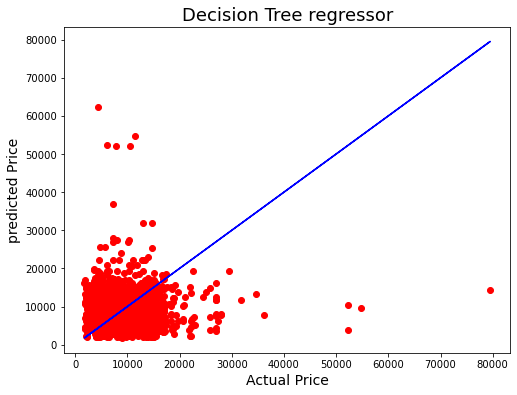

In [69]:
import matplotlib.pyplot as plt 
plt. figure(figsize=(8,6)) 
plt. scatter(x=y_test, y=pred_test, color='r') 
plt.plot(y_test, y_test, color='b') 
plt.xlabel('Actual Price', fontsize=14) 
plt.ylabel('predicted Price', fontsize=14) 
plt.title('Decision Tree regressor', fontsize=18) 
plt.show()

# Regularization

In [70]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score

In [71]:
from sklearn.linear_model import Lasso 
parameters = {'alpha' : [.0001, .001, .01, .1, 1, 10], 'random_state' :list (range(0,10))} 
ls= Lasso() 
clf= GridSearchCV(ls, parameters) 
clf.fit(x_train, y_train)
print (clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [72]:
cv_score=cross_val_score (ls , x, y,cv=5) 
cv_mean=cv_score.mean() 
cv_mean

0.2590803037317851

# Ensemble Technique

In [74]:
from sklearn.ensemble import RandomForestRegressor 

rf=RandomForestRegressor (criterion="mse", max_features="auto") 
rf.fit(x_train, y_train) 
rf.score(x_train,y_train) 
pred_decision =rf.predict(x_test) 

rfs = r2_score(y_test, pred_decision) 
print('R2 core:' , rfs*100 ) 
     
rfscore = cross_val_score( rf,x,y,cv=5) 
rfc = rfscore.mean() 
print('Cross Val Score:',rfc* 100)

R2 core: 88.73199262028328
Cross Val Score: 86.3637762088538


In [75]:
import pickle 
filename = 'FPP_train_project.pkl'
pickle.dump(rf, open( filename, 'wb' ))

# Conclusion

In [76]:
loaded_model = pickle.load(open('FPP_train_project.pkl', 'rb')) 
result = loaded_model.score(x_test, y_test)

print(result)

0.8873199262028327


In [77]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:], pred_decision[:]], index=["Predicted", "orginal"])

conclusion

,0,1,2,3,4,5,6,7,8,9,...,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136
Predicted,2281.39,10352.51,12801.78,29344.24,5228.0,10733.81,4036.57,6380.54,4056.47,7499.08,...,14219.65,9387.37,15491.3,8796.05,16638.49,9327.507667,4398.97,12445.8,5557.98,14099.31
orginal,2281.39,10352.51,12801.78,29344.24,5228.0,10733.81,4036.57,6380.54,4056.47,7499.08,...,14219.65,9387.37,15491.3,8796.05,16638.49,9327.507667,4398.97,12445.8,5557.98,14099.31


After Training on different models we have reached to the best possible accuracy and r2 score.

# Working on Test Data

In [78]:
df.test=pd.read_excel('Test_Set.xlsx')
df.test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


There are 2671 Rows and 10 Columns in the Test Data.

In [79]:
df.test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

All the values are in the 'Object' data type thrghout the test Data.

In [80]:
df.test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There are no Null Values in the Data.

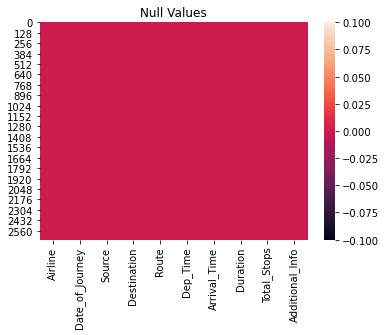

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.test.isnull())
plt.title('Null Values')
plt.show()

As observed earlier there are no null values.

# Data Visulisation

In [84]:
Index=['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price']

2671


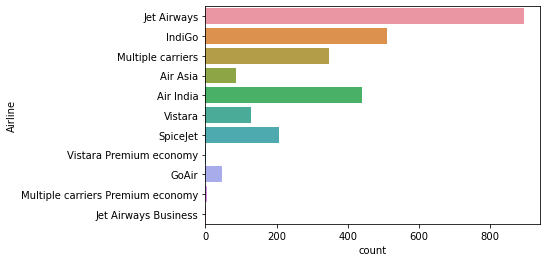

In [91]:
ax=sns.countplot(y='Airline',data=df.test)
print(df.test['Airline'].count())

As per the visualistion, 'Jet Airways' has the highest number of Flights and 'Vistara premium Economy', 'Jet Airways Business' has the least number of Flights.

2671


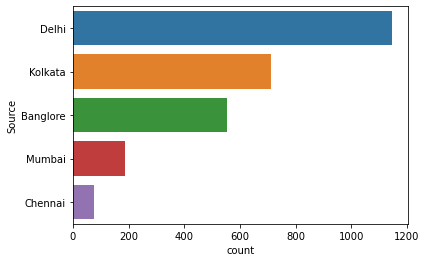

In [92]:
ax=sns.countplot(y='Source',data=df.test)
print(df.test['Source'].count())

'Delhi' is the most frequent Bording Airport, more than 1100 Flights were Boarded from Delhi, and 'Chennai' being the least boarded Airport where only around 50 Flights were boarded by their passengers

2671


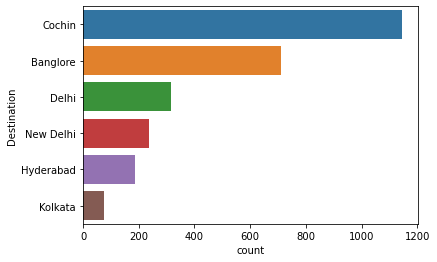

In [93]:
ax=sns.countplot(y='Destination',data=df.test)
print(df.test['Destination'].count())

More than 1100 Flights were completed in "Cochin", and least flights were destined for "Kolkata" i.e. 50.

2671


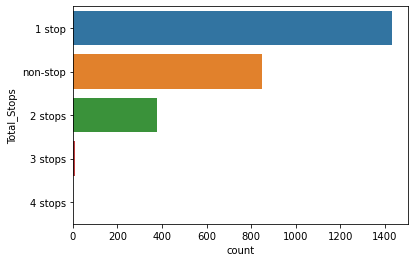

In [94]:
ax=sns.countplot(y='Total_Stops',data=df.test)
print(df.test['Total_Stops'].count())

Most Flights are having 1 Stop i.e. more than 1400 flights, And there are nearly no flights with 4 Stops.
And around 900 flights are Non-Stop

2671


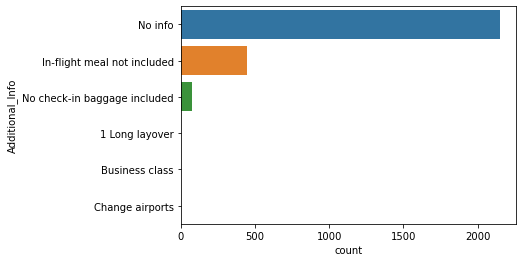

In [100]:
ax=sns.countplot(y='Additional_Info',data=df.test)
print(df.test['Additional_Info'].count())

Well, For addtional information more than 2000 flights have 'No-Info', But there are still 5 different Additional informations provided for rest of the flights.

# Encoding The Data

In [102]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.test.columns:
    if df.test[i].dtypes=="object":
        df.test[i]=le.fit_transform(df.test[i].values.reshape(-1,1))

# Checking for Skewness

In [103]:
df.test.skew()

Airline            0.483882
Date_of_Journey   -0.044181
Source            -0.424997
Destination        1.263630
Route             -0.281807
Dep_Time           0.178928
Arrival_Time      -0.523661
Duration          -0.275404
Total_Stops        0.672623
Additional_Info   -1.719119
dtype: float64

Keeping +/-(0.5) as the range of skewness.
There are 3 columns out of the range of skewness.

In [119]:
from sklearn.preprocessing import power_transform
df.tnew=power_transform(x)

df.tnew=pd.DataFrame(df.tnew,columns=df.test.columns)

In [120]:
df.tnew.skew()

Airline            0.024809
Date_of_Journey   -0.048610
Source             0.033346
Destination        0.037055
Route             -0.111439
Dep_Time          -0.049069
Arrival_Time      -0.070195
Duration          -0.058161
Total_Stops        0.231992
Additional_Info    6.225946
dtype: float64

# Checking for outliers

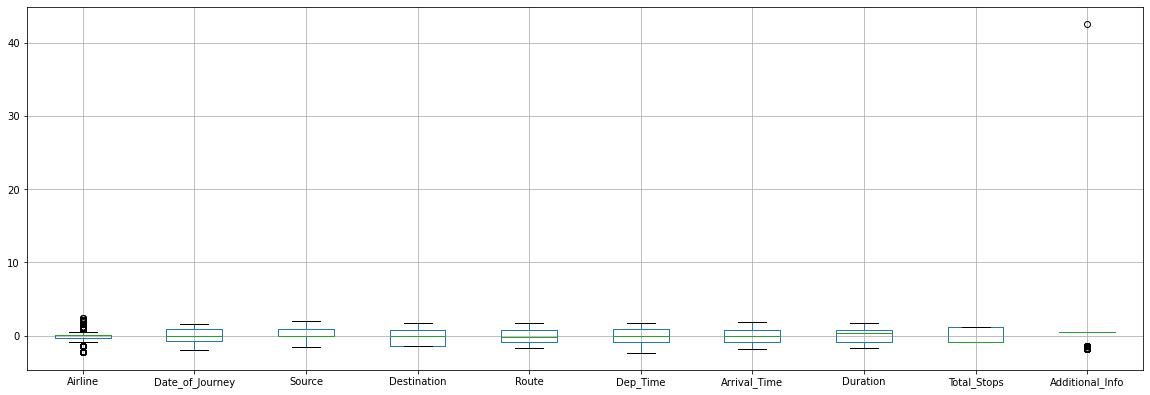

In [127]:
df.tnew.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=.25)
plt.show()

Only few outliers are present in the data. There's no need to treat them.

# Loading Train Model

In [122]:
fitted_model=pickle.load(open('FPP_train_project.pkl','rb'))

In [123]:
fitted_model

RandomForestRegressor()

In [125]:
predictions=fitted_model.predict(df.tnew)

In [126]:
predictions

array([ 4652.68333333,  9106.45      , 13641.0725    , ...,
        7354.92      ,  9612.68      , 12045.0425    ])

Predicted Prices for the test data.